In [2]:
import requests
import pandas as pd
import numpy as np
import quandl
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline

# Expand display screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
quandl.ApiConfig.api_key = "r_d9-mgZX7FE_-U-GxqY"

# Getting the Housing Indices Data

In [95]:
states = quandl.get('FMAC/HPI_ST_SA', start_date='2015-01-1', end_date='2021-4-30').reset_index()
states['Date'] =  pd.to_datetime(states['Date'])

In [96]:
northeast = states[['Date','Connecticut (CT)', 'Maine (ME)', 'Massachusetts (MA)', 'New Hampshire (NH)', 
                    'Rhode Island (RI)', 'Vermont (VT)', 'New Jersey (NJ)', 'New York (NY)', 'Pennsylvania (PA)']]
path = Path("Resources/northeast.csv")
northeast.to_csv(path, index = False)

In [97]:
midwest = states[['Date', 'Illinois (IL)', 'Indiana (IN)', 'Michigan (MI)', 'Ohio (OH)', 'Wisconsin (WI)', 
                 'Iowa (IA)', 'Kansas (KS)', 'Minnesota (MN)', 'Missouri (MO)', 'Nebraska (NE)', 'North Dakota (ND)', 'South Dakota (SD)']]
path = Path("Resources/midwest.csv")
midwest.to_csv(path, index = False)

In [98]:
south = states[['Date', 'Delaware (DE)', 'Florida (FL)', 'Georgia (GA)', 'Maryland (MD)', 'North Carolina (NC)', 
                'South Carolina (SC)', 'Virginia (VA)', 'District of Columbia (DC)', 'West Virginia (WV)',
               'Alabama (AL)', 'Kentucky (KY)', 'Mississippi (MS)', 'Tennessee (TN)', 'Arkansas (AR)', 'Louisiana (LA)', 
                'Oklahoma (OK)', 'Texas (TX)']]
path = Path("Resources/south.csv")
south.to_csv(path, index = False)

In [99]:
west = states[['Date', 'Arizona (AZ)', 'Colorado (CO)', 'Idaho (ID)', 'Montana (MT)', 'Nevada (NV)', 
               'New Mexico (NM)', 'Utah (UT)', 'Wyoming (WY)',
              'Alaska (AK)', 'California (CA)', 'Hawaii (HI)', 'Oregon (OR)', 'Washington (WA)']]
path = Path("Resources/west.csv")
west.to_csv(path, index = False)

# Import the Data from csv

In [3]:
# Set the Path to the resources folder

path = Path("Resources/northeast.csv")
northeast = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
northeast['Northeast'] = northeast.agg("mean", axis = "columns")

path = Path("Resources/west.csv")
west = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
west['West'] = west.agg("mean", axis = "columns")

path = Path("Resources/south.csv")
south = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
south['South'] = south.agg("mean", axis = "columns")

path = Path("Resources/midwest.csv")
midwest = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
midwest['Midwest'] = midwest.agg("mean", axis = "columns")

In [4]:
df1 = pd.merge(northeast['Northeast'], west['West'], left_index = True, right_index = True)
df2 = pd.merge(south['South'], midwest['Midwest'], left_index = True, right_index = True)
df = pd.merge(df1, df2, left_index = True, right_index = True)
df

,Northeast,West,South,Midwest
Date,,,,
2015-01-31,148.054352,163.562046,150.356368,129.968599
2015-02-28,148.417480,164.272409,150.888578,130.258967
2015-03-31,148.876989,165.008630,151.404428,130.693993
2015-04-30,149.424277,165.871627,151.885438,131.173450
2015-05-31,150.029435,166.803787,152.503551,131.662758
...,...,...,...,...
2020-12-31,205.720768,248.168108,204.826643,176.805679
2021-01-31,207.834409,251.766864,206.569910,178.432480
2021-02-28,210.276411,255.857701,208.552010,180.278361


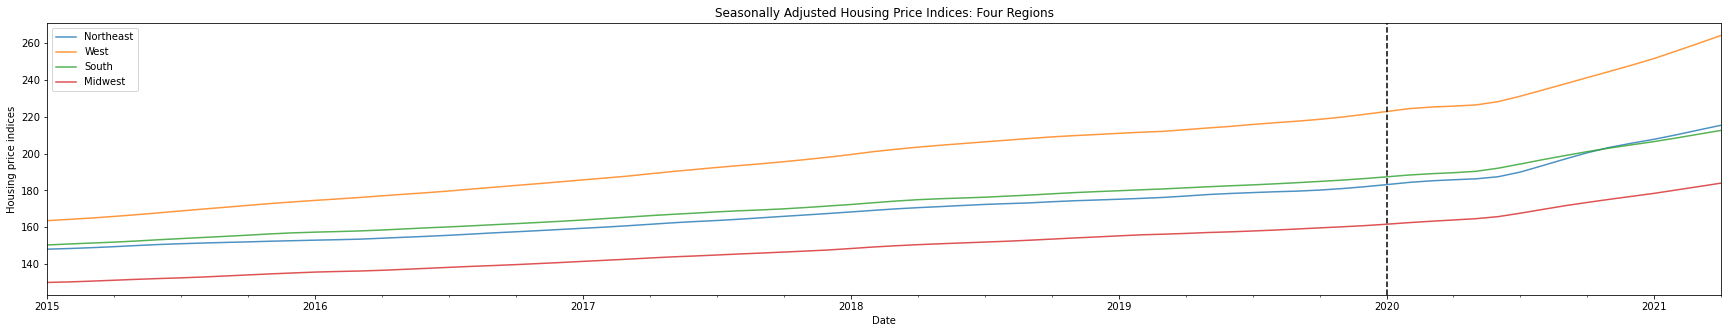

In [5]:
# Plot the Housing Index Throughout the time

df.plot(figsize = (30,5), 
        title = 'Seasonally Adjusted Housing Price Indices: Four Regions',
        ylabel = 'Housing price indices',
        legend = True,  
        alpha = 0.8)

# Add a vertile line indicating the occurrence of Covid
plt.axvline(dt.datetime(2020, 1, 31), color = 'black', ls = '--')

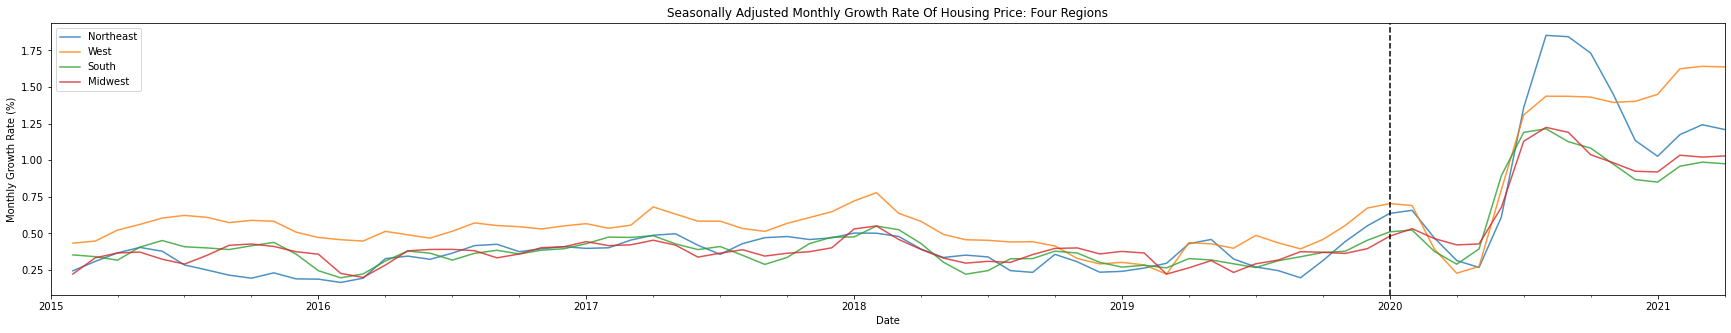

In [60]:
# Plot the Growth Rate Throughout the time

df_chg = df.pct_change()
# Change growth rate into percentage term
df_chg = df_chg.multiply(100)  

df_chg.plot(figsize = (30,5), 
            title = 'Seasonally Adjusted Monthly Growth Rate Of Housing Price: Four Regions',
            ylabel = 'Monthly Growth Rate (%)',
            legend = True,
            alpha = 0.8)        

# Add a vertile line indicating the occurrence of Covid
plt.axvline(dt.datetime(2020, 1, 31), color = 'black', ls = '--')


# Getting the Mortgage Rate Data

In [10]:
morg_us = quandl.get('FMAC/30US', sart_date='2015-1-1', end_date='2021-4-30').reset_index()
morg_us['Date'] = pd.to_datetime(morg_us['Date'])
morg_us['date_end'] = pd.to_datetime(morg_us['Date']) + pd.offsets.MonthEnd(0) 
morg_us

,Date,Value,date_end
0,1971-04-02,7.33,1971-04-30
1,1971-04-09,7.31,1971-04-30
2,1971-04-16,7.31,1971-04-30
3,1971-04-23,7.31,1971-04-30
4,1971-04-30,7.29,1971-04-30
...,...,...,...
2611,2021-04-01,3.18,2021-04-30
2612,2021-04-08,3.13,2021-04-30
2613,2021-04-15,3.04,2021-04-30
2614,2021-04-22,2.97,2021-04-30


In [23]:
## morg_us['FMAC_30US'] = Group By Date_end Data 
morg_agg_us = pd.DataFrame(morg_us.groupby(by =['date_end'])['Value'].mean())
morg_agg_us = morg_agg_us
morg_agg_us.to_csv()

# save that into folder
path = Path("Resources/morgage_rate.csv")
morg_agg_us.to_csv(path, index = False)

<AxesSubplot:title={'center':'30-year US Mortgate Rate'}, xlabel='date_end'>

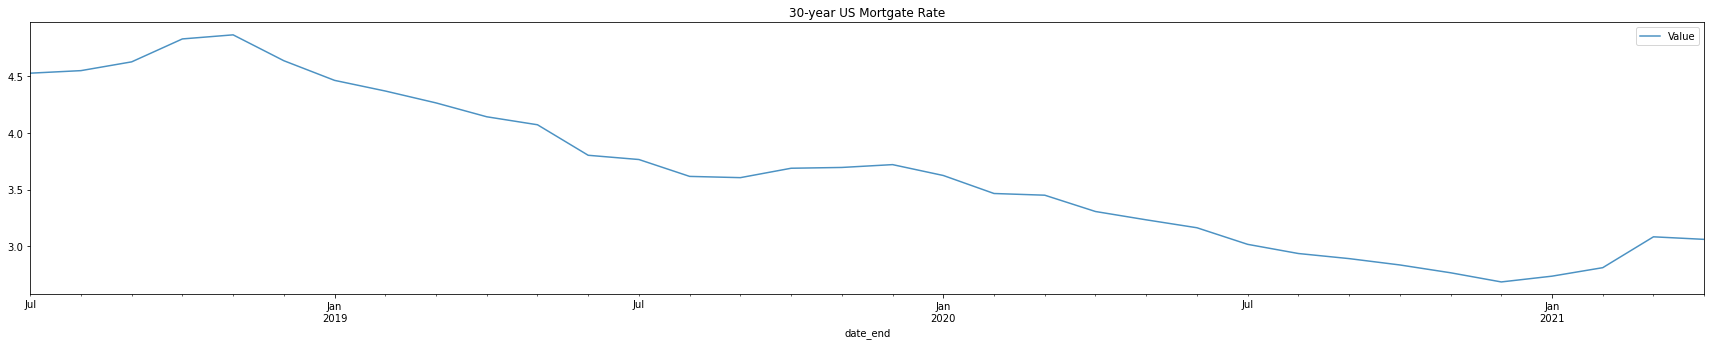

In [24]:
# Set the date_end variable as index
# morg_agg_us = morg_agg_us.set_index('date_end')
morg_agg_us = morg_agg_us[morg_agg_us.index >= '2018-07-31']

# the change of mortgate rate
morg_chg_agg_us = morg_agg_us.pct_change()

morg_agg_us.plot(figsize = (30,5),
                  title = '30-year US Mortgate Rate',
                  alpha = 0.8)

In [30]:
# Merge morgage rate into housing data 
df_morg = pd.merge(df, morg_agg_us, left_index = True, right_index = True)
df_pre_morg = df_morg[df_morg.index <= '2019-12-31']
df_dur_morg = df_morg[df_morg.index >  '2019-12-31']

# Merge morgage rate into housing growth data 
df_chg_morg = pd.merge(df_chg, morg_chg_agg_us, left_index = True, right_index = True)
df_pre_chg_morg = df_chg_morg[df_chg_morg.index <= '2019-12-31']
df_dur_chg_morg = df_chg_morg[df_chg_morg.index >  '2019-12-31']


In [59]:
correlation = df_dur_morg.corr()
correlation

,Northeast,West,South,Midwest,Value
Northeast,1.000000,0.995405,0.998078,0.998177,-0.720414
West,0.995405,1.000000,0.994225,0.995683,-0.665371
South,0.998078,0.994225,1.000000,0.999737,-0.737017
Midwest,0.998177,0.995683,0.999737,1.000000,-0.728406
Value,-0.720414,-0.665371,-0.737017,-0.728406,1.000000


Text(0.5, 1.0, 'Midwest Region: correlation = -0.73')

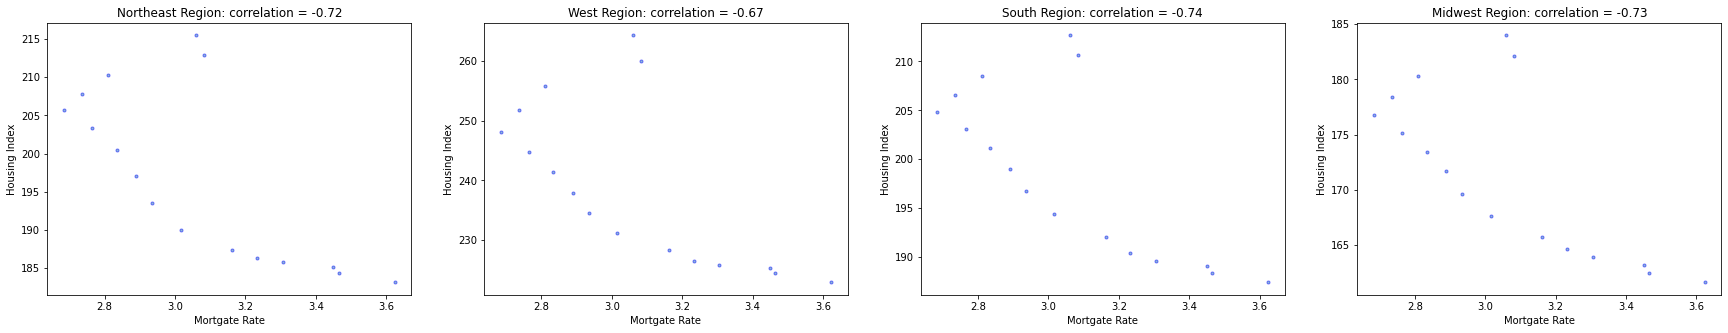

In [58]:
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

axs[0].scatter(df_dur_morg['Value'], df_dur_morg['Northeast'],alpha=0.5, marker = ".", edgecolors='blue')
axs[0].set_xlabel("Mortgate Rate")
axs[0].set_ylabel("Housing Index")
axs[0].set_title("Northeast Region: correlation = -0.72")

axs[1].scatter(df_dur_morg['Value'], df_dur_morg['West'],alpha=0.5, marker = ".", edgecolors='blue')
axs[1].set_xlabel("Mortgate Rate")
axs[1].set_ylabel("Housing Index")
axs[1].set_title("West Region: correlation = -0.67")

axs[2].scatter(df_dur_morg['Value'], df_dur_morg['South'],alpha=0.5, marker = ".", edgecolors='blue')
axs[2].set_xlabel("Mortgate Rate")
axs[2].set_ylabel("Housing Index")
axs[2].set_title("South Region: correlation = -0.74")

axs[3].scatter(df_dur_morg['Value'], df_dur_morg['Midwest'],alpha=0.5, marker = ".", edgecolors='blue')
axs[3].set_xlabel("Mortgate Rate")
axs[3].set_ylabel("Housing Index")
axs[3].set_title("Midwest Region: correlation = -0.73")

# plt.savefig('scatter_10.png') 
# plt.show()